Importing *pandas library* and reading *csv file* using it


In [1]:
import pandas as pd
btc_price= pd.read_csv('/content/Bitcoin_9_16_2013-11_15_2013_historical_data_coinmarketcap.csv', sep=';')
btc_price.tail(3)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
3649,2013-09-19T00:00:00.000Z,2013-09-19T23:59:59.999Z,2013-09-19T02:06:02.000Z,2013-09-19T17:31:01.000Z,131.369995,131.770004,128.449997,129.649994,0.0,1.519884e+09,2013-09-19T23:59:59.999Z
3650,2013-09-18T00:00:00.000Z,2013-09-18T23:59:59.999Z,2013-09-18T12:36:02.000Z,2013-09-18T05:21:02.000Z,131.710007,133.199997,130.539993,131.470001,0.0,1.540598e+09,2013-09-18T23:59:59.999Z
3651,2013-09-17T00:00:00.000Z,2013-09-17T23:59:59.999Z,2013-09-17T22:26:01.000Z,2013-09-17T05:56:01.000Z,131.589996,132.759995,124.889999,131.660004,0.0,1.542278e+09,2013-09-17T23:59:59.999Z


Dropping rows in which volume cells is 0.0


In [2]:
btc_price.drop(btc_price[btc_price['volume'] == 0.0].index,axis=0,inplace=True)

changing format of *timeOpen* and *timeClose* columns





In [ ]:
btc_price['timeOpen']=btc_price['timeOpen'].str.replace('T00:00:00.000Z','')
btc_price['timeClose']=btc_price['timeClose'].str.replace('T23:59:59.999Z','')

Splitting time from *timeHigh* and *timeLow* and saving it to new column


In [4]:
btc_price['hightime'] = btc_price['timeHigh'].str.split('T').str[1]
btc_price['lowtime'] = btc_price['timeLow'].str.split('T').str[1]
btc_price.head(3)

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp,hightime,lowtime
0,2023-09-16,2023-09-16,2023-09-16T02:22:00.000Z,2023-09-16T10:05:00.000Z,26606.198652,26754.770183,26473.890777,26568.281288,7.402031e+09,5.177552e+11,2023-09-16T23:59:59.999Z,02:22:00.000Z,10:05:00.000Z
1,2023-09-15,2023-09-15,2023-09-15T23:09:00.000Z,2023-09-15T15:00:00.000Z,26533.818838,26840.497925,26240.700625,26608.693365,1.147974e+10,5.185173e+11,2023-09-15T23:59:59.999Z,23:09:00.000Z,15:00:00.000Z
2,2023-09-14,2023-09-14,2023-09-14T18:37:00.000Z,2023-09-14T05:55:00.000Z,26228.277860,26774.623357,26171.451852,26539.674442,1.381136e+10,5.171408e+11,2023-09-14T23:59:59.999Z,18:37:00.000Z,05:55:00.000Z


Dropping timeClose, timeHigh,	timeLow and	timestamp columns

In [5]:
btc_price.drop('timeLow',axis=1,inplace=True)
btc_price.drop('timeHigh',axis=1,inplace=True)
btc_price.drop('timeClose',axis=1,inplace=True)
btc_price.drop('timestamp',axis=1,inplace=True)

changing format of *hightime* and *lowtime* columns


In [6]:
btc_price['hightime']=btc_price['hightime'].str.replace(':00.000Z','')
btc_price['lowtime']=btc_price['lowtime'].str.replace(':00.000Z','')
btc_price.head(3)

<ipython-input-6-0121c8678bd3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  btc_price['hightime']=btc_price['hightime'].str.replace(':00.000Z','')
<ipython-input-6-0121c8678bd3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  btc_price['lowtime']=btc_price['lowtime'].str.replace(':00.000Z','')


,timeOpen,open,high,low,close,volume,marketCap,hightime,lowtime
0,2023-09-16,26606.198652,26754.770183,26473.890777,26568.281288,7.402031e+09,5.177552e+11,02:22,10:05
1,2023-09-15,26533.818838,26840.497925,26240.700625,26608.693365,1.147974e+10,5.185173e+11,23:09,15:00
2,2023-09-14,26228.277860,26774.623357,26171.451852,26539.674442,1.381136e+10,5.171408e+11,18:37,05:55


Renaming *timeOpen* column  to *Date*

In [7]:
btc_price.rename(columns={'timeOpen':'Date'},inplace=True)
btc_price.head(3)

,Date,open,high,low,close,volume,marketCap,hightime,lowtime
0,2023-09-16,26606.198652,26754.770183,26473.890777,26568.281288,7.402031e+09,5.177552e+11,02:22,10:05
1,2023-09-15,26533.818838,26840.497925,26240.700625,26608.693365,1.147974e+10,5.185173e+11,23:09,15:00
2,2023-09-14,26228.277860,26774.623357,26171.451852,26539.674442,1.381136e+10,5.171408e+11,18:37,05:55


Reversed *btc_price* dataframe and store in *df_reversed* dataframe

In [8]:
# Reverse the order of rows
df_reversed = btc_price.iloc[::-1]
df_reversed.reset_index(drop=True,inplace=True)

df_reversed.head(3)

,Date,open,high,low,close,volume,marketCap,hightime,lowtime
0,2013-12-27,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,00:51:02.000Z,19:11:01.000Z
1,2013-12-28,737.979980,747.059998,705.349976,727.830017,32505800.0,8.869919e+09,12:06:01.000Z,18:11:01.000Z
2,2013-12-29,728.049988,748.609985,714.440002,745.049988,19011300.0,9.082104e+09,21:46:02.000Z,04:41:01.000Z


changing the formats of data present in *hightime* and *lowtime* columns

In [9]:
df_reversed['hightime']=df_reversed['hightime'].str.replace(r':\d+\.\d+Z', '', regex=True)
df_reversed['lowtime']=df_reversed['lowtime'].str.replace(r':\d+\.\d+Z', '', regex=True)


changing the *Date* column dtype to *DateTime* format

In [10]:
df_reversed['Date']=pd.to_datetime(df_reversed['Date'])

line plot showing the price change of *btc* from *2014* to *2023*

*bitcoin* all time high price was *$68,000*

<Axes: xlabel='Date'>

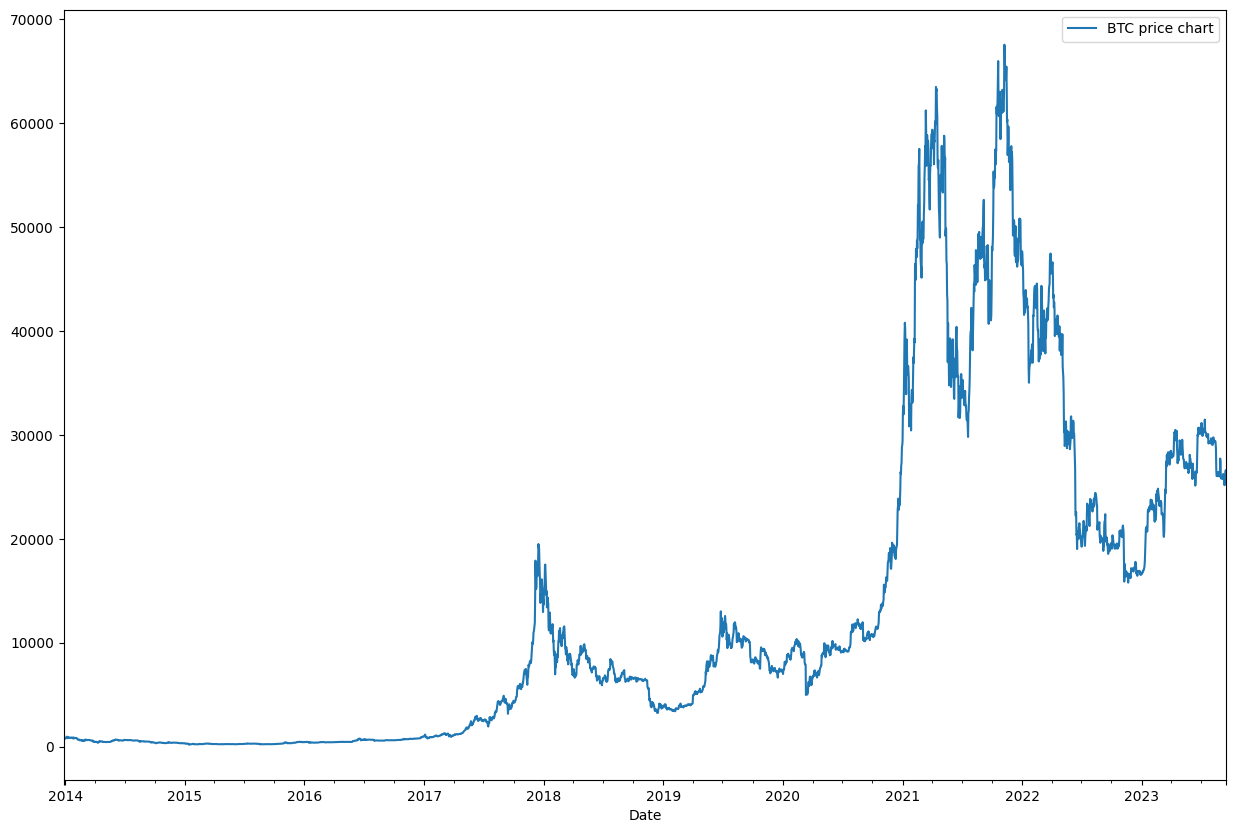

In [11]:
df_line=df_reversed[['Date','close']]
df_line.plot(kind='line',
            x='Date',
            y='close',
            label='BTC price chart',
            figsize=(15,10)
            )

grouping the data frame into years and months. saving it on last_close_per_month

In [12]:
# Extract the year from the 'Date' column
df_reversed['Year'] = df_reversed['Date'].dt.year

# Extract the month from the 'Date' column
df_reversed['Month'] = df_reversed['Date'].dt.month

# Group by the 'Year' and 'Month' columns and aggregate
# Calculate the last day of each month
last_close_per_month = df_reversed.groupby(['Year', 'Month'])['close'].last().reset_index()

# Print the result
print(last_close_per_month)

     Year  Month         close
0    2013     12    754.010010
1    2014      1    829.919983
2    2014      2    549.260010
3    2014      3    457.001007
4    2014      4    447.644989
..    ...    ...           ...
113  2023      5  27219.658608
114  2023      6  30477.251282
115  2023      7  29230.110879
116  2023      8  25931.472893
117  2023      9  26568.281288

[118 rows x 3 columns]


creating new column which consist of month to month price change in percentage

In [13]:
last_close_per_month['change%'] = last_close_per_month['close'].pct_change() * 100
last_close_per_month.tail(12)

,Year,Month,close,change%
106,2022,10,20495.774232,5.475485
107,2022,11,17168.565548,-16.233633
108,2022,12,16547.495366,-3.617484
109,2023,1,23139.283910,39.835567
110,2023,2,23147.353390,0.034874
111,2023,3,28478.484606,23.031278
112,2023,4,29268.807043,2.775156
113,2023,5,27219.658608,-7.001134
114,2023,6,30477.251282,11.967794
115,2023,7,29230.110879,-4.092037


dropping close column and changing index, columns and values format using pivot

In [14]:
last_close_per_month.drop('close',axis=1,inplace=True)
last_close_per_month=last_close_per_month.pivot(index='Year',columns='Month',values='change%')
last_close_per_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,10.067502,-33.817715,-16.796963,-2.047264,39.324022,2.584670,-8.371720,-18.503158,-19.009216,-12.565897,11.742097,-15.303389
2015,-32.083459,16.921879,-3.948275,-3.308027,-2.521756,14.284716,8.202319,-19.179341,2.609798,33.087346,20.102440,14.111584
2016,-14.353164,18.692018,-4.790526,7.580223,18.528811,26.713348,-7.226091,-7.877468,5.953895,14.963386,6.379569,29.241604
2017,0.691059,21.595868,-9.168024,25.760640,69.628819,8.503732,15.901871,63.576829,-7.753560,49.085787,58.209136,38.332561
2018,-27.798739,1.729763,-32.933289,32.508931,-18.899091,-14.546907,21.493442,-9.547789,-5.854569,-4.647909,-36.411579,-6.834697
2019,-7.612354,11.481097,6.501504,30.333734,60.249292,26.154919,-6.762664,-4.511012,-13.880623,10.920322,-17.717699,-4.967629
2020,29.984023,-8.031853,-25.127760,34.477899,9.268346,-3.414687,23.916334,3.155872,-7.673510,27.785298,42.412325,47.773176
2021,14.180669,36.308760,30.531110,-1.983501,-35.354564,-6.139409,18.793382,13.310110,-7.157154,40.026727,-7.034582,-18.768353


changing columns name from numbers to month names

In [15]:
last_close_per_month.rename(columns= {
    1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)
last_close_per_month.drop(2013,axis=0,inplace=True)
last_close_per_month


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2014,10.067502,-33.817715,-16.796963,-2.047264,39.324022,2.584670,-8.371720,-18.503158,-19.009216,-12.565897,11.742097,-15.303389
2015,-32.083459,16.921879,-3.948275,-3.308027,-2.521756,14.284716,8.202319,-19.179341,2.609798,33.087346,20.102440,14.111584
2016,-14.353164,18.692018,-4.790526,7.580223,18.528811,26.713348,-7.226091,-7.877468,5.953895,14.963386,6.379569,29.241604
2017,0.691059,21.595868,-9.168024,25.760640,69.628819,8.503732,15.901871,63.576829,-7.753560,49.085787,58.209136,38.332561
2018,-27.798739,1.729763,-32.933289,32.508931,-18.899091,-14.546907,21.493442,-9.547789,-5.854569,-4.647909,-36.411579,-6.834697
2019,-7.612354,11.481097,6.501504,30.333734,60.249292,26.154919,-6.762664,-4.511012,-13.880623,10.920322,-17.717699,-4.967629
2020,29.984023,-8.031853,-25.127760,34.477899,9.268346,-3.414687,23.916334,3.155872,-7.673510,27.785298,42.412325,47.773176
2021,14.180669,36.308760,30.531110,-1.983501,-35.354564,-6.139409,18.793382,13.310110,-7.157154,40.026727,-7.034582,-18.768353
2022,-16.894667,12.239410,5.430116,-17.180564,-15.703527,-37.768830,17.954098,-14.085560,-3.082200,5.475485,-16.233633,-3.617484


matrix table showing each montn returns of *btc* from 2014 to present month

we can see that *february* month has most positive returns

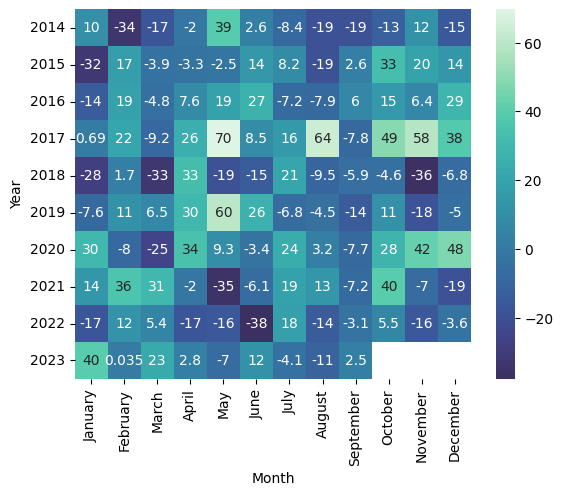

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap with the modified data
sns.heatmap(data=last_close_per_month, annot=True, cmap='mako', center=0)
plt.yticks(rotation=0)
plt.show()

line plot showing the marketcap change of *btc* from *2014* to *2023*

btc reached *1.3 trillions* marketcap at all time high

<ipython-input-20-5f0fd333e7a1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axie.set_yticklabels([f'{int(y/1e9)}B' for y in axie.get_yticks()])


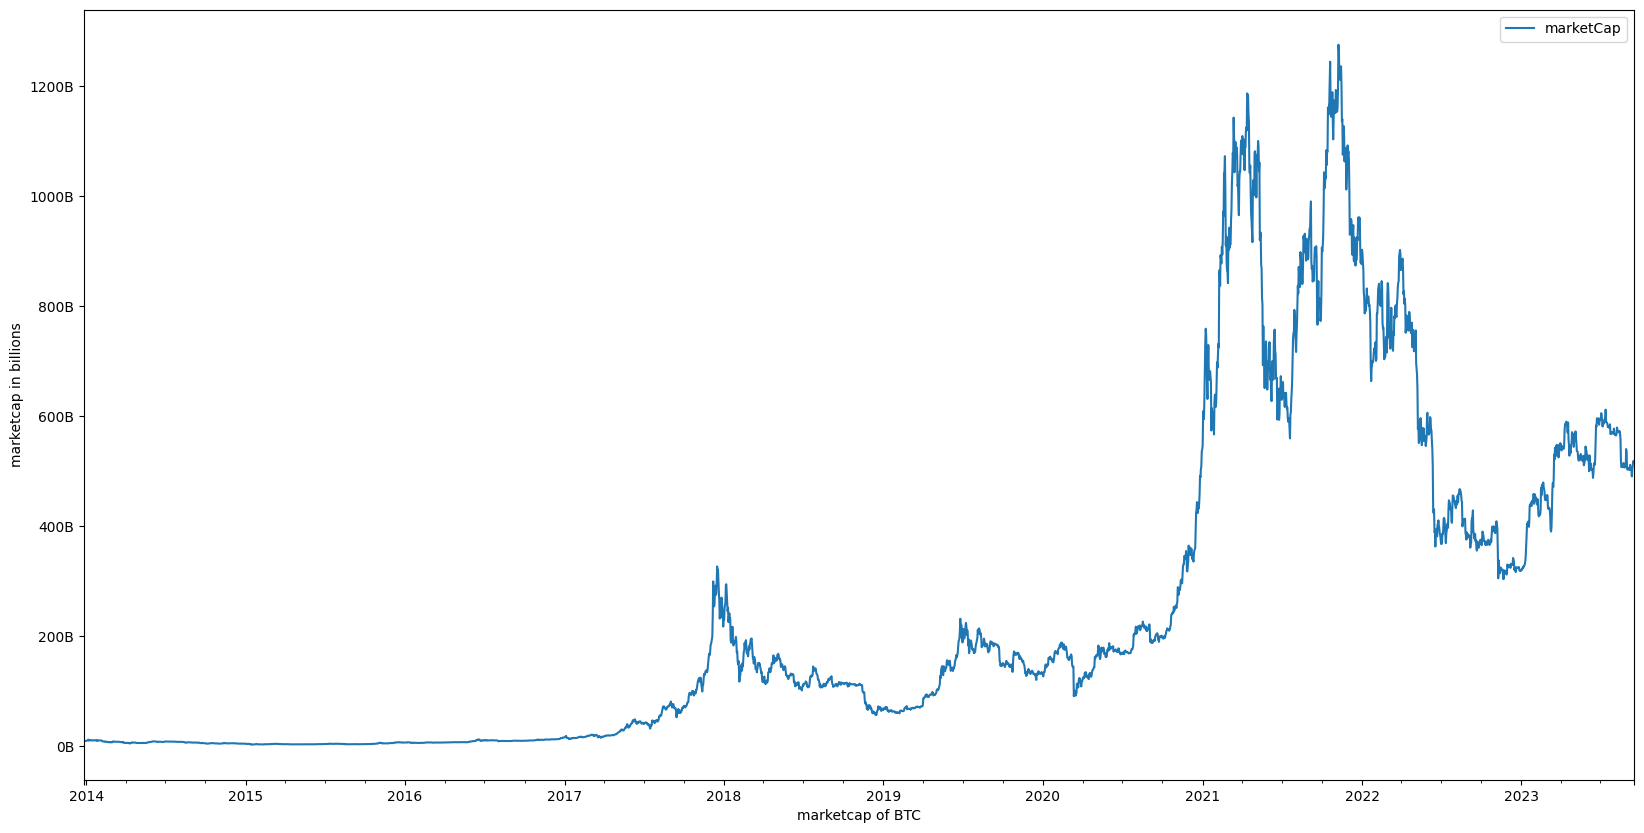

In [20]:
df_market=df_reversed[['Date','marketCap']]
axie =df_market.plot(kind='line',
            x='Date',
            y='marketCap',
            xlabel='marketcap of BTC',
            ylabel='marketcap in billions',
            figsize=(20,10)
            )
axie.set_yticklabels([f'{int(y/1e9)}B' for y in axie.get_yticks()])
plt.show()

This code creates and displays a bar chart using data in the 'monthly' Series, representing the sum of volumes for each month from 2014 to the present day, with the x-axis labeled as months and the y-axis labeled as 'volume in billions,' and it customizes the order of the months on the x-axis.

*May* month has highest trading volume

*July* month has lowest volume compared to other months


<ipython-input-22-0d289567898d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(y/1e9)}B' for y in ax.get_yticks()])


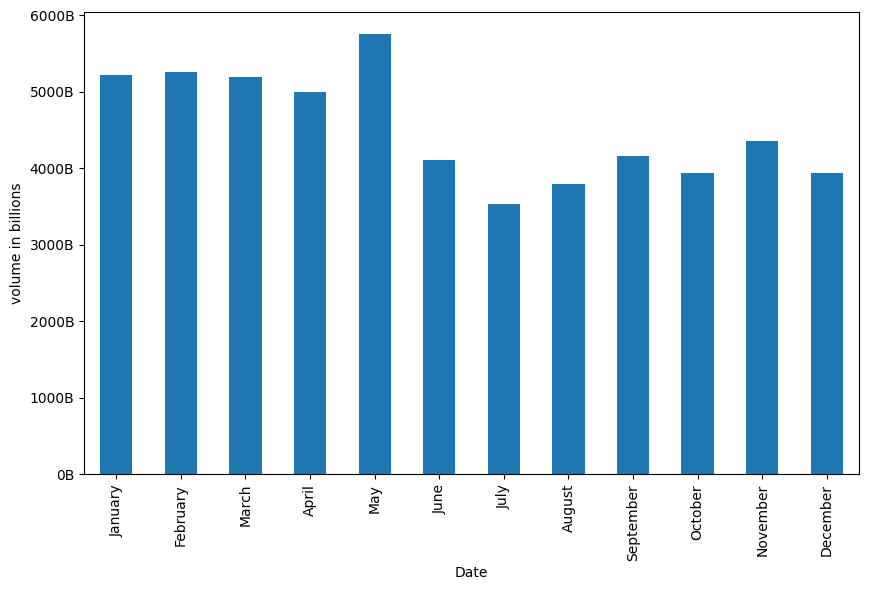

In [22]:

monthly = df_reversed.groupby(df_reversed['Date'].dt.strftime('%B'))['volume'].sum().sort_values()
# Define a custom sorting order for months
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the resulting Series 'monthly' using the custom order
monthly = monthly.reindex(custom_month_order)

ax =monthly.plot(kind='bar',
             x='volume',
             y='date',
             ylabel='volume in billions',
             label='months',
             figsize=(10,6)
             )
ax.set_yticklabels([f'{int(y/1e9)}B' for y in ax.get_yticks()])
plt.show()


corelation matrix containing correlation between *'open', 'high', 'low', 'close', 'volume', 'marketCap'*

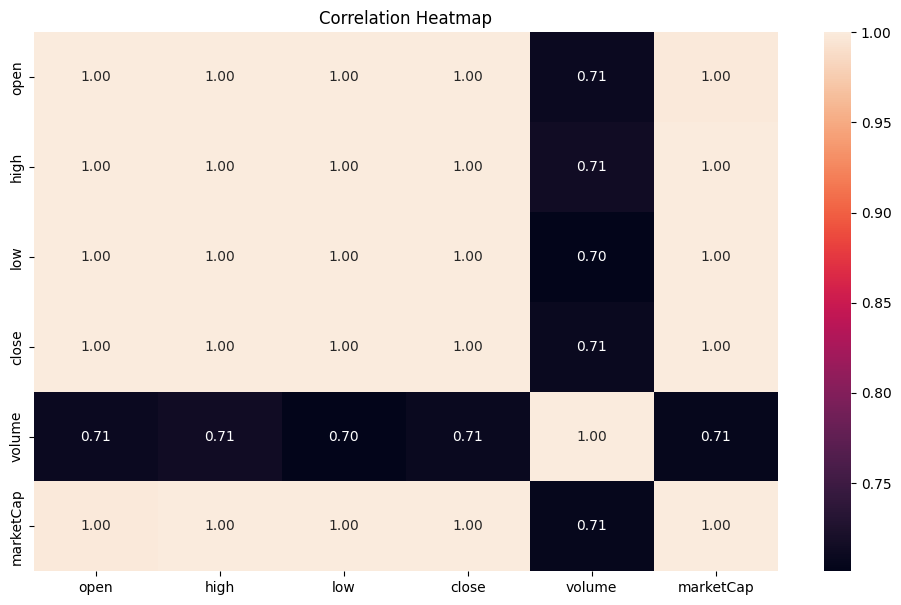

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
btc_price1 = btc_price[['open', 'high', 'low', 'close', 'volume', 'marketCap']]
cor = btc_price1.corr()  # Use the .corr() method to calculate the correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(data=cor, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()